<a href="https://colab.research.google.com/github/uzeziogho/MLDM/blob/main/MLDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from pylab import *

In [2]:
import seaborn as sns

from collections import Counter

In [4]:
class1= pd.read_csv('/heart_failure_clinical_records_dataset.csv')
class1.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
kf=class1.copy()
class1.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


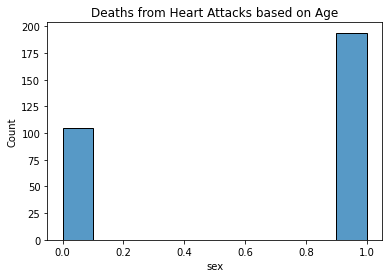

In [25]:

plt.title('Deaths from Heart Attacks based on Age')
sns.histplot(class1.sex)
plt.show()

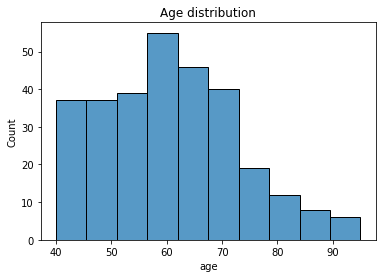

In [6]:
sns.histplot(class1.age)
plt.title('Age distribution')
plt.show()

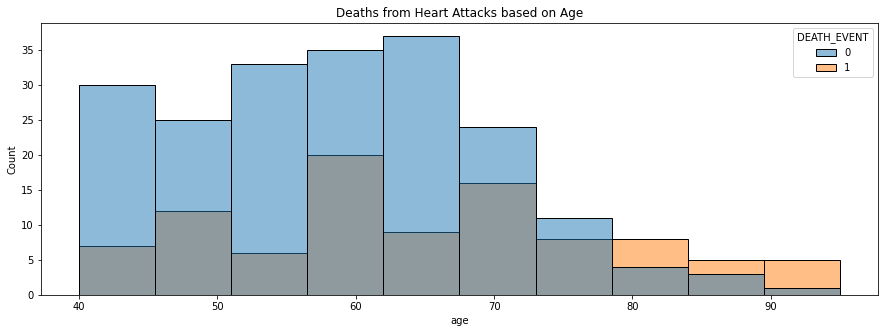

In [14]:
plt.figure(figsize=(15,5))
plt.title('Deaths from Heart Attacks based on Age')
sns.histplot(x="age",hue="DEATH_EVENT",data=class1)
plt.show()

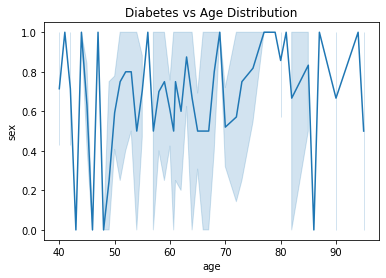

In [19]:
sns.lineplot(x="age",y="sex",data=class1)
plt.title('Diabetes vs Age Distribution')
plt.show()

In [26]:
x = class1.iloc[:, :-1].values
y = class1.iloc[:, 12]
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64


In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state=0)

In [28]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [30]:
# 1 Algorithm: Logistic Regression
lr = LogisticRegression()
lr.fit(x_train, y_train)
pred_lr = lr.predict(x_test)
print(y_test)
print(pred_lr)
print(metrics.accuracy_score(y_test, pred_lr)*100)
print(confusion_matrix(y_test, pred_lr))
print(classification_report(y_test, pred_lr))

206    0
188    0
12     1
219    0
237    0
      ..
76     0
210    0
223    0
253    0
235    0
Name: DEATH_EVENT, Length: 90, dtype: int64
[0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
81.11111111111111
[[58  4]
 [13 15]]
              precision    recall  f1-score   support

           0       0.82      0.94      0.87        62
           1       0.79      0.54      0.64        28

    accuracy                           0.81        90
   macro avg       0.80      0.74      0.76        90
weighted avg       0.81      0.81      0.80        90



In [31]:
#2 Algorithm: KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)
print(y_test)
print(pred_knn)
print(metrics.accuracy_score(y_test, pred_knn)*100)
print(confusion_matrix(y_test, pred_knn))
print(classification_report(y_test, pred_knn))

206    0
188    0
12     1
219    0
237    0
      ..
76     0
210    0
223    0
253    0
235    0
Name: DEATH_EVENT, Length: 90, dtype: int64
[0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
76.66666666666667
[[59  3]
 [18 10]]
              precision    recall  f1-score   support

           0       0.77      0.95      0.85        62
           1       0.77      0.36      0.49        28

    accuracy                           0.77        90
   macro avg       0.77      0.65      0.67        90
weighted avg       0.77      0.77      0.74        90



In [32]:
#3 Algorithm: Support Vector Classifier
svm = SVC()
svm.fit(x_train, y_train)
pred_svm = svm.predict(x_test)
print(y_test)
print(pred_svm)
print(metrics.accuracy_score(y_test, pred_svm)*100)
print(confusion_matrix(y_test, pred_svm))
print(classification_report(y_test, pred_svm))

206    0
188    0
12     1
219    0
237    0
      ..
76     0
210    0
223    0
253    0
235    0
Name: DEATH_EVENT, Length: 90, dtype: int64
[0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
83.33333333333334
[[59  3]
 [12 16]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.89        62
           1       0.84      0.57      0.68        28

    accuracy                           0.83        90
   macro avg       0.84      0.76      0.78        90
weighted avg       0.83      0.83      0.82        90



In [34]:
#3 Algorithm: Neural Networks
nn = MLPClassifier(hidden_layer_sizes =(200, 200, 200), activation = 'relu', max_iter = 100)
nn.fit(x_train, y_train)
pred_nn = nn.predict(x_test)
print(y_test)
print(pred_nn)
print(metrics.accuracy_score(y_test, pred_nn)*100)
print(confusion_matrix(y_test, pred_nn))
print(classification_report(y_test, pred_nn))

206    0
188    0
12     1
219    0
237    0
      ..
76     0
210    0
223    0
253    0
235    0
Name: DEATH_EVENT, Length: 90, dtype: int64
[0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1
 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0]
80.0
[[54  8]
 [10 18]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.86        62
           1       0.69      0.64      0.67        28

    accuracy                           0.80        90
   macro avg       0.77      0.76      0.76        90
weighted avg       0.80      0.80      0.80        90



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
